# Historical GDP data of China from 1961 to 2021.

#### uploaded china gdp csv to a secret gist for easier access [Here](https://gist.githubusercontent.com/dubeyji10/5a4050ab54917c74ea48185f39436e21/raw/c4f9ddf03efb42aeca9aebe4ec345c7763afa637/chinaGDP_1.csv)


## China GDP Data analysis


### upload csv dataset from local source or get using requests module

In [2]:
print('connected')

connected


In [3]:
%%time

import requests
url  = "https://gist.githubusercontent.com/dubeyji10/5a4050ab54917c74ea48185f39436e21/raw/c4f9ddf03efb42aeca9aebe4ec345c7763afa637/chinaGDP_1.csv"

print('...making a request')
response = requests.request("GET", url)
print('total chars : ',len(response.text))
with open('China_GDP_Data.csv','w') as f:
  f.write(response.text)
  print('..written data to a csv file')

...making a request
total chars :  1342
..written data to a csv file
CPU times: user 94.1 ms, sys: 8.15 ms, total: 102 ms
Wall time: 305 ms


### Importing pandas for quick csv read and other data operations

In [4]:
import pandas as pd

In [5]:
!ls

China_GDP_Data.csv  sample_data


In [6]:
data = pd.read_csv('/content/China_GDP_Data.csv')
print('read')

read


In [7]:
data

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80
...,...,...,...,...
56,1965,59.55,119,-2.64
57,1964,56.48,116,7.45
58,1963,48.42,101,5.99
59,1962,42.16,90,2.93


### Columns (headers)

In [8]:
columns = data.columns

In [9]:
columns

Index(['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD',
       'Percentage_Growth '],
      dtype='object')

##### note : last column is "'Percentage_Growth '" -- a space in the column name

### Task #1 best 5 and worst 5 years

## Rows with 5 highest GDP_In_Billion_USD

In [10]:
data.nlargest(5,columns = ['GDP_In_Billion_USD'])

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
1,2020,2667.69,1933,-6.60
4,2017,2651.47,1981,6.80


## Rows with 5 highest Per_Capita_in_USD

In [11]:
data.nlargest(5,columns = ['Per_Capita_in_USD'])

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80
1,2020,2667.69,1933,-6.60


### Rows with 5 highest combination of 'GDP_In_Billion_USD', and'Per_Capita_in_USD'

In [12]:
data.nlargest(5,columns = ['GDP_In_Billion_USD','Per_Capita_in_USD'])

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
1,2020,2667.69,1933,-6.60
4,2017,2651.47,1981,6.80


### Rows with 5 highest combination of 'Percentage_Growth'

In [13]:
data.nlargest(5,columns = ['Percentage_Growth '])

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
33,1988,296.59,354,9.63
46,1975,98.47,158,9.15
0,2021,3173.40,2277,8.95
22,1999,458.82,442,8.85
11,2010,1675.62,1358,8.50


## So five best year in terms of GDP growth : 
 - 1988
 - 1975
 - 2021
 - 1999
 - 2010

In [14]:
data.nsmallest(5,columns = ['Percentage_Growth '])

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
1,2020,2667.69,1933,-6.60
42,1979,152.99,224,-5.24
56,1965,59.55,119,-2.64
49,1972,71.46,123,-0.55
55,1966,45.87,90,-0.06


## So five worst year in terms of GDP growth : 
 - 1966
 - 1969
 - 1972
 - 1979
 - 2020

### Visualzing data using matplotlib package

In [15]:
from matplotlib import pyplot as plt
# numpy to handle numpy arrays
import numpy as np

### #1 Year - vs - GDP_In_Billion_USD

In [16]:
xAxis = data['Year'].to_numpy()
yAxis = data['GDP_In_Billion_USD'].to_numpy()


Text(0.5, 0, 'Years')

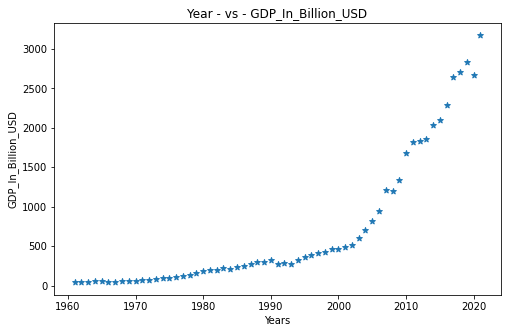

In [17]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(xAxis , yAxis,marker='*')
plt.title("Year - vs - GDP_In_Billion_USD")
plt.ylabel("GDP_In_Billion_USD")
plt.xlabel("Years")


### #2 Per_Capita_in_USD and years

Text(0.5, 0, 'Years')

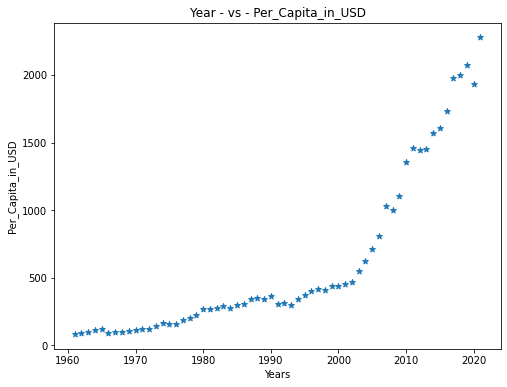

In [18]:
xAxis = data['Year'].to_numpy()
yAxis = data['Per_Capita_in_USD'].to_numpy()
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.scatter(xAxis , yAxis,marker='*')
plt.title("Year - vs - Per_Capita_in_USD")
plt.ylabel("Per_Capita_in_USD")
plt.xlabel("Years")


### #3 Percentage growth for years

Text(0.5, 0, 'Years')

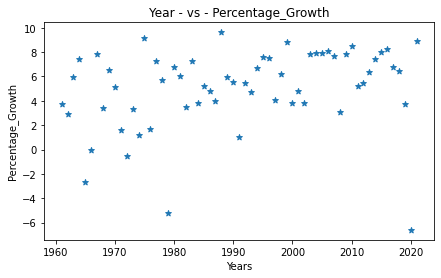

In [19]:
xAxis = data['Year'].to_numpy()
yAxis = data['Percentage_Growth '].to_numpy()
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(4)
plt.scatter(xAxis , yAxis,marker='*')
plt.title("Year - vs - Percentage_Growth")
plt.ylabel("Percentage_Growth")
plt.xlabel("Years")


### customizing colors for items condition : Percentage_Growth

In [20]:
# current xAxis is percentage growth
customColors = ['limegreen' if percent >= 8 else 'crimson' for percent in yAxis]

Text(0.5, 0, 'Years')

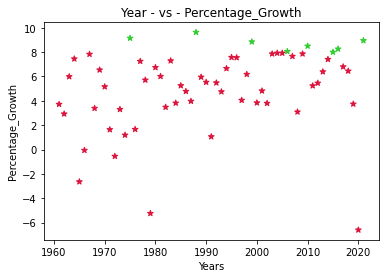

In [21]:
plt.scatter(xAxis , yAxis,marker='*' , color=customColors)
plt.title("Year - vs - Percentage_Growth")
plt.ylabel("Percentage_Growth")
plt.xlabel("Years")


### test for bar

Text(0.5, 0, 'Years')

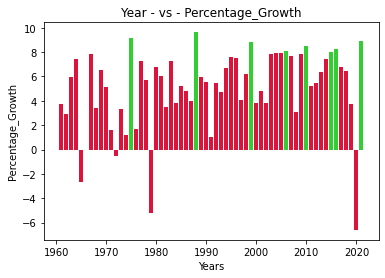

In [22]:
plt.bar(xAxis , yAxis, color=customColors)
plt.title("Year - vs - Percentage_Growth")
plt.ylabel("Percentage_Growth")
plt.xlabel("Years")


### percentage growth -- xAxis

### maximum of percentage an its index

In [ ]:
maxPer = np.max(yAxis)
maxPer

9.63

In [ ]:
yearPos = np.argmax(yAxis , axis=0)
yearPos

33

In [ ]:
xAxis[yearPos]

1988

### best performing year in terms of %growth : 1988 with 9.63%

# Visualizing percentage growth with years

### So max percentage growth received in year 1988

#### Same can be said from graph below

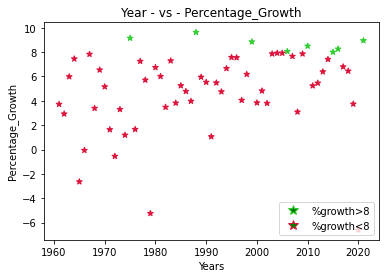

In [23]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
                  
                   Line2D([0], [0], marker='*', color='limegreen', lw=0 , label='%growth>8',
                          markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='*', color='crimson', lw=0 , label='%growth<8',
                          markerfacecolor='g', markersize=10)
                   ]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower right')
plt.scatter(xAxis , yAxis,marker='*' , color=customColors)
plt.title("Year - vs - Percentage_Growth")
plt.ylabel("Percentage_Growth")
plt.xlabel("Years")

plt.show()

## ANNOTATION OF PERCENTAGE GROWTH

In [25]:
fontSizes = [15 if percent >= 8 else 6 for percent in yAxis]
print(fontSizes)

[15, 6, 6, 6, 6, 15, 15, 6, 6, 6, 6, 15, 6, 6, 6, 15, 6, 6, 6, 6, 6, 6, 15, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 15, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 15, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


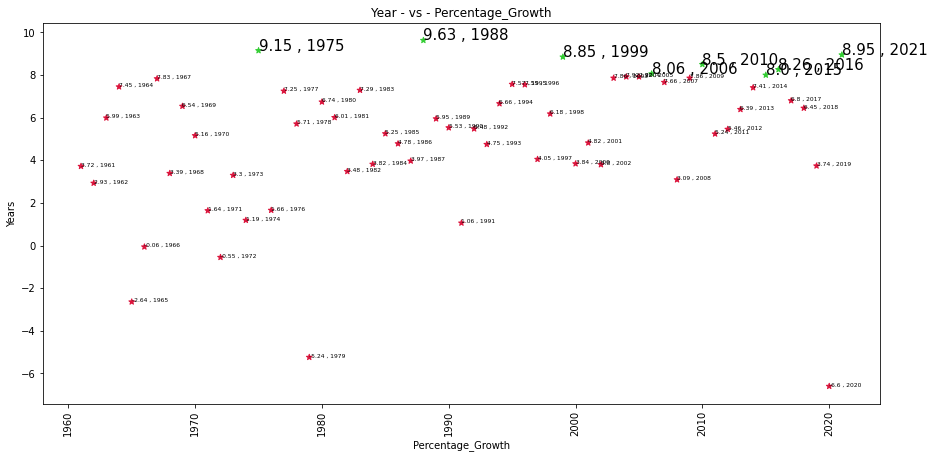

In [26]:
liste_summe = yAxis
liste_datum = xAxis
liste_string = yAxis

f = plt.figure()

f.set_figwidth(15)
f.set_figheight(7)

# plt.subplots_adjust(bottom=0.4)
for s, d , fontSize in zip(liste_summe, liste_datum , fontSizes):
    # print("s : ",s,"d : ",d , 'font-size : ',fontSize)
    plt.annotate("{} , {}".format(s,d) , xy=(d,s) , fontsize= fontSize)

    # plt.annotate(d, xy = (d,s ))
'''
    # plt.annotate("{} , {}".format(s,d) , xy=(d,s) , fontsize= fontSize)
'''

plt.xticks(rotation = 90)

plt.scatter(xAxis , yAxis,marker='*' , color=customColors)
# plt.plot_date(liste_string, liste_summe)
plt.title("Year - vs - Percentage_Growth")
plt.xlabel("Percentage_Growth")
plt.ylabel("Years")

plt.show()


### bar for the best and worst performing years

In [32]:
fontSizes = [15 if percent < 0 else 0 if percent<8 else 15 for percent in yAxis]
print(fontSizes)


[15, 15, 0, 0, 0, 15, 15, 0, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 15, 0, 0, 0, 0, 0, 15, 15, 0, 0, 0, 0]


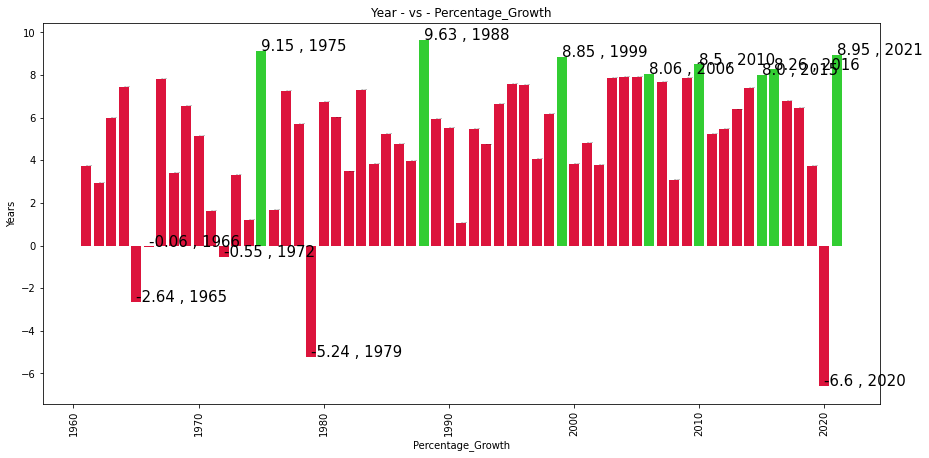

In [33]:
liste_summe = yAxis
liste_datum = xAxis
liste_string = yAxis

f = plt.figure()

f.set_figwidth(15)
f.set_figheight(7)

# plt.subplots_adjust(bottom=0.4)
for s, d , fontSize in zip(liste_summe, liste_datum , fontSizes):
    # print("s : ",s,"d : ",d , 'font-size : ',fontSize)
    plt.annotate("{} , {}".format(s,d) , xy=(d,s) , fontsize= fontSize)

    # plt.annotate(d, xy = (d,s ))
'''
    # plt.annotate("{} , {}".format(s,d) , xy=(d,s) , fontsize= fontSize)
'''

plt.xticks(rotation = 90)

plt.bar(xAxis , yAxis, color=customColors)
# plt.plot_date(liste_string, liste_summe)
plt.title("Year - vs - Percentage_Growth")
plt.xlabel("Percentage_Growth")
plt.ylabel("Years")

plt.show()


### only best performing years

In [46]:
yAxis

array([ 8.95, -6.6 ,  3.74,  6.45,  6.8 ,  8.26,  8.  ,  7.41,  6.39,
        5.46,  5.24,  8.5 ,  7.86,  3.09,  7.66,  8.06,  7.92,  7.92,
        7.86,  3.8 ,  4.82,  3.84,  8.85,  6.18,  4.05,  7.55,  7.57,
        6.66,  4.75,  5.48,  1.06,  5.53,  5.95,  9.63,  3.97,  4.78,
        5.25,  3.82,  7.29,  3.48,  6.01,  6.74, -5.24,  5.71,  7.25,
        1.66,  9.15,  1.19,  3.3 , -0.55,  1.64,  5.16,  6.54,  3.39,
        7.83, -0.06, -2.64,  7.45,  5.99,  2.93,  3.72])

In [47]:
xAxis

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961])

In [51]:
bestVal = max(yAxis)
bestVal

9.63

### Plotting top N records

In [64]:
n = 5

In [65]:
currDF_5  = data.nlargest(n,columns = ['Percentage_Growth '])
currDF_5

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
33,1988,296.59,354,9.63
46,1975,98.47,158,9.15
0,2021,3173.40,2277,8.95
22,1999,458.82,442,8.85
11,2010,1675.62,1358,8.50


In [66]:
yAxis_1  = currDF_5['Percentage_Growth ']
xAxis_1  = [str(i) for i in currDF_5['Year'].values ]


Text(0, 0.5, 'Years')

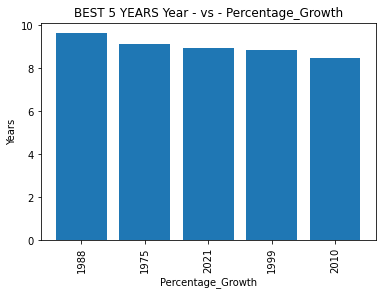

In [67]:
plt.xticks(rotation = 90)

plt.bar(xAxis_1 , yAxis_1)
# plt.plot_date(liste_string, liste_summe)
plt.title("BEST 5 YEARS Year - vs - Percentage_Growth")
plt.xlabel("Percentage_Growth")
plt.ylabel("Years")


### Visualizing cases for worst years also ( merge with best years )

In [68]:
fiveSmallest_dataframe = data.nsmallest(5,columns = ['Percentage_Growth '])
smallest5PercentageGrowthValues = fiveSmallest_dataframe['Percentage_Growth ']
smallest5PercentageGrowthValues.to_numpy()

array([-6.6 , -5.24, -2.64, -0.55, -0.06])

### so it is clear that worst year had a percentage growth < 0 ... -6.66%

In [69]:
customColors2 = ['red' if percent < 0 else 'orange' if percent<8 else 'green' for percent in yAxis]
print(customColors2)

fontSizes2 = [15 if percent < 0 else 0 if percent<8 else 15 for percent in yAxis]
print(fontSizes2)


['green', 'red', 'orange', 'orange', 'orange', 'green', 'green', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'red', 'orange', 'orange', 'orange', 'orange', 'orange', 'red', 'red', 'orange', 'orange', 'orange', 'orange']
[15, 15, 0, 0, 0, 15, 15, 0, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 15, 0, 0, 0, 0, 0, 15, 15, 0, 0, 0, 0]


#### best and worst years have same font-size

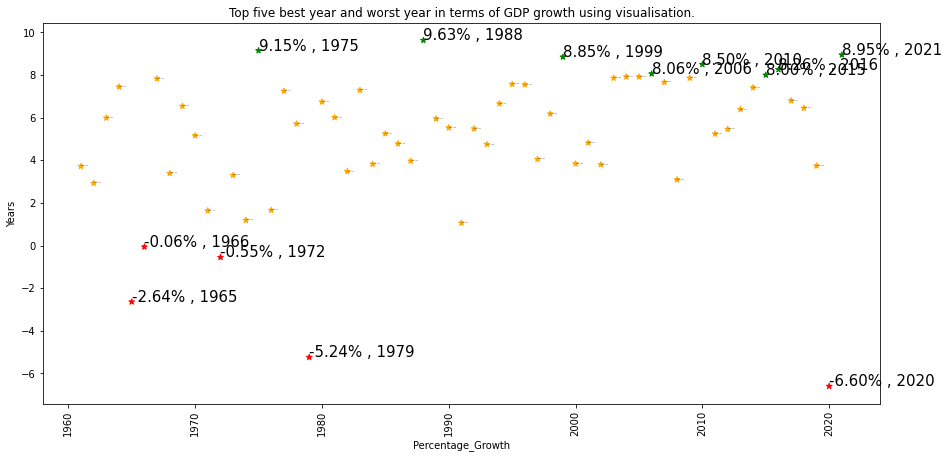

In [70]:
liste_summe = yAxis
liste_datum = xAxis
liste_string = yAxis


f = plt.figure()

f.set_figwidth(15)
f.set_figheight(7)

# plt.subplots_adjust(bottom=0.4)
for s, d , fontSize in zip(liste_summe, liste_datum , fontSizes2):
    # print("s : ",s,"d : ",d)
    # plt.annotate(d, xy = (d,s ))
    plt.annotate("{:.2f}% , {}".format(s,d) , xy=(d,s) , fontsize= fontSize)
plt.xticks(rotation = 90)

plt.scatter(xAxis , yAxis,marker='*' , color=customColors2)
# plt.hist()
# plt.plot_date(liste_string, liste_summe)
plt.title("Top five best year and worst year in terms of GDP growth using visualisation.")
plt.xlabel("Percentage_Growth")
plt.ylabel("Years")

plt.show()

In [ ]:
# print(np.random.rand(1,len(yAxis)))
somePoints = np.random.rand(len(yAxis),2)
somePoints[0]

array([0.40567404, 0.24543733])

In [ ]:
somePoints[0][0] , somePoints[0][1]


(0.40567403724658535, 0.24543732917404537)

### arrrow annotation example ( needs too much time since graphic points are involved )

# Annotation is possible in python
# But : 
- in python it is not interactive that is why I propose a web based solution for rendering points


## Time series analysis is avaiable at : 

https://gist.github.com/dubeyji10/3dc2f68b5b5542c7835bba07e0af28fd